# Análisis de paquetes

In [1]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install import_ipynb
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utils as utils

importing Jupyter notebook from utils.ipynb


Graficar entropia a medida que llegan paquetes

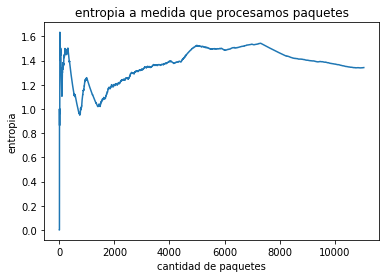

In [2]:
plt.plot(utils.get_entropy())
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [3]:
utils.hola()

chau


In [4]:
utils.show_source("Lucy_Wifi_Casa/fuente_final.txt")

(['UNICAST',
  'UNICAST',
  'BROADCAST',
  'BROADCAST',
  'UNICAST',
  'UNICAST',
  'UNICAST',
  'BROADCAST',
  'BROADCAST',
  'UNICAST'],
 [' 2048',
  ' 34525',
  ' 2054',
  ' 2048',
  ' 2054',
  ' 2048',
  ' 34525',
  ' 2054',
  ' 2048',
  ' 2054'])

In [6]:
unicast_broadcast_symbol, protocol = utils.show_source()

unicast_broadcast_counter = collections.Counter(unicast_broadcast_symbol)

percent_unicast = 100*unicast_broadcast_counter['UNICAST'] /np.sum(list(unicast_broadcast_counter.values()))
percent_broadcast = 100- percent_unicast

print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)


percent unicast 60.0
percent broadcast 40.0
